# **Example 1.1**



In [ ]:
roslaunch turtlebot_teleop keyboard_teleop.launch

In [ ]:
Control Your Turtlebot!
---------------------------
Moving around:
   u    i    o
   j    k    l
   m    ,    .

q/z : increase/decrease max speeds by 10%
w/x : increase/decrease only linear speed by 10%
e/c : increase/decrease only angular speed by 10%
space key, k : force stop
anything else : stop smoothly

CTRL-C to qui

In [ ]:
roslaunch <package_name> <launch_file>

In [ ]:
roscd <package_name>

# **Example 1.2**



In [ ]:
roscd turtlebot_teleop
ls

# And... what's a launch file?

## **Example 1.3**



In [ ]:
roscd turtlebot_teleop
cd launch
cat keyboard_teleop_cpp.launch

In [ ]:
<launch>
  <!-- turtlebot_teleop_key already has its own built in velocity smoother -->
  <node pkg="turtlebot_teleop" type="turtlebot_teleop_key" name="turtlebot_teleop_keyboard"  output="screen">
    <param name="scale_linear" value="0.5" type="double"/>
    <param name="scale_angular" value="1.5" type="double"/>
    <remap from="turtlebot_teleop_keyboard/cmd_vel" to="cmd_vel_mux/input/teleop"/>
  </node>
</launch>

In [ ]:
All launch files are contained within a <launch> tag. Inside that tag, you can see a <node> tag, where we specify the following parameters:

pkg="package_name"             # Name of the package that contains the code of the ROS program to execute
type="cpp_executable_name"     # Name of the cpp executable file that we want to execute

name="node_name"               # Name of the ROS node that will launch our C++ file
output="type_of_output"        # Through which channel you will print the output of the program

In [ ]:
#!/usr/bin/env python

# Copyright (c) 2011, Willow Garage, Inc.
# All rights reserved.

# POSSIBILITY OF SUCH DAMAGE.

import rospy

from geometry_msgs.msg import Twist

import sys, select, termios, tty

msg = """
Control Your Turtlebot!
---------------------------
Moving around:
   u    i    o
   j    k    l
   m    ,    .

q/z : increase/decrease max speeds by 10%
w/x : increase/decrease only linear speed by 10%
e/c : increase/decrease only angular speed by 10%
space key, k : force stop
anything else : stop smoothly

CTRL-C to quit
"""

moveBindings = {
        'i':(1,0),
        'o':(1,-1),
        'j':(0,1),
        'l':(0,-1),
        'u':(1,1),
        ',':(-1,0),
        '.':(-1,1),
        'm':(-1,-1),
           }

speedBindings={
        'q':(1.1,1.1),
        'z':(.9,.9),
        'w':(1.1,1),
        'x':(.9,1),
        'e':(1,1.1),
        'c':(1,.9),
          }

def getKey():
    tty.setraw(sys.stdin.fileno())
    rlist, _, _ = select.select([sys.stdin], [], [], 0.1)
    if rlist:
        key = sys.stdin.read(1)
    else:
        key = ''

    termios.tcsetattr(sys.stdin, termios.TCSADRAIN, settings)
    return key

speed = .2
turn = 1

def vels(speed,turn):
    return "currently:\tspeed %s\tturn %s " % (speed,turn)

if __name__=="__main__":
    settings = termios.tcgetattr(sys.stdin)

    rospy.init_node('turtlebot_teleop')
    pub = rospy.Publisher('~cmd_vel', Twist, queue_size=5)

    x = 0
    th = 0
    status = 0
    count = 0
    acc = 0.1
    target_speed = 0
    target_turn = 0
    control_speed = 0
    control_turn = 0
    try:
        print msg
        print vels(speed,turn)
        while(1):
            key = getKey()
            if key in moveBindings.keys():
                x = moveBindings[key][0]
                th = moveBindings[key][1]
                count = 0
            elif key in speedBindings.keys():
                speed = speed * speedBindings[key][0]
                turn = turn * speedBindings[key][1]
                count = 0

                print vels(speed,turn)
                if (status == 14):
                    print msg
                status = (status + 1) % 15
            elif key == ' ' or key == 'k' :
                x = 0
                th = 0
                control_speed = 0
                control_turn = 0
            else:
                count = count + 1
                if count > 4:
                    x = 0
                    th = 0
                if (key == '\x03'):
                    break

            target_speed = speed * x
            target_turn = turn * th

            if target_speed > control_speed:
                control_speed = min( target_speed, control_speed + 0.02 )
            elif target_speed < control_speed:
                control_speed = max( target_speed, control_speed - 0.02 )
            else:
                control_speed = target_speed

            if target_turn > control_turn:
                control_turn = min( target_turn, control_turn + 0.1 )
            elif target_turn < control_turn:
                control_turn = max( target_turn, control_turn - 0.1 )
            else:
                control_turn = target_turn

            twist = Twist()
            twist.linear.x = control_speed; twist.linear.y = 0; twist.linear.z = 0
            twist.angular.x = 0; twist.angular.y = 0; twist.angular.z = control_turn
            pub.publish(twist)

            #print("loop: {0}".format(count))
            #print("target: vx: {0}, wz: {1}".format(target_speed, target_turn))
            #print("publihsed: vx: {0}, wz: {1}".format(twist.linear.x, twist.angular.z))

    except:
        print e

    finally:
        twist = Twist()
        twist.linear.x = 0; twist.linear.y = 0; twist.linear.z = 0
        twist.angular.x = 0; twist.angular.y = 0; twist.angular.z = 0
        pub.publish(twist)

    termios.tcsetattr(sys.stdin, termios.TCSADRAIN, settings)

# Create a package


## **Example 1.4**



In [ ]:
roscd
cd ..
pwd

In [ ]:
cd src

In [ ]:
catkin_create_pkg my_package roscpp

In [ ]:
catkin_create_pkg <package_name> <package_dependecies>

# Compile a package


## **Example 1.6**



In [ ]:
roscd; cd ..
catkin_make

In [ ]:
catkin_make --only-pkg-with-deps <package_name>

In [ ]:
catkin_make --only-pkg-with-deps my_package

# My first ROS program


## **Example 1.7**






**C++ Program {1.1a-cpp}: simple.cpp**



In [ ]:
#include <ros/ros.h>

int main(int argc, char** argv) {                    // 1 start the main C++ program

    ros::init(argc, argv, "ObiWan");                 // 2 Initiate Name of the node 

    ros::NodeHandle nh;                              //3  node

    ROS_INFO("Help me Obi-Wan Kenobi, you're my only hope");      //4  Print 

    ros::spinOnce();                                 //5 if add subs. w/o it,  your callbacks would never get called       


    return 0;                                        // 6 We end our program
}

In [ ]:
#include <ros/ros.h>

// Here we are including all the headers necessary to use the most common public pieces of the ROS system.
// Always we create a new C++ file, we will need to add this include.

int main(int argc, char** argv) {                                  // 1 We start the main C++ program
 
    ros::init(argc, argv, "ObiWan");                                 // 2 We initiate a ROS node called ObiWan

    ros::NodeHandle nh;             // We create a handler for the node. This handler will actually do the initialization of the                           //3  node
    
    ROS_INFO("Help me Obi-Wan Kenobi, you're my only hope");        //4  This is the same as a print in ROS
    
    ros::spinOnce();     //5  Calling ros::spinOnce() here is not necessary for this simple program, because we are not                       
                       // receiving any callbacks. 
                       
                       //However, if you were to add a subscription into this application, and      
                         // did not have ros::spinOnce() here, your callbacks would never get called. So, add it for good  measure.

    return 0;                                                       // 6 We end our program
}

2. Create a new launch file inside the launch directory.



In [ ]:
roscd my_package
mkdir launch

In [ ]:
touch launch/my_package_launch_file.launch

In [ ]:
<launch>
    <!-- My Package launch file -->
    <node pkg="my_package" type="simple" name="ObiWan"  output="screen">
    </node>
</launch>

3. Modify the CMakeLists.txt file in order to generate an executable from the C++ file you have just created.



In [ ]:
add_executable(simple src/simple.cpp)

add_dependencies( simple
      ${simple_EXPORTED_TARGETS} ${catkin_EXPORTED_TARGETS})

target_link_libraries( simple
   ${catkin_LIBRARIES}
 )

4. Compile your package as explained previously.



In [ ]:
roscd;
cd ..;
catkin_make

In [ ]:
roslaunch my_package my_package_launch_file.launch

In [ ]:
SUMMARY
========

PARAMETERS
 * /rosdistro: indigo
 * /rosversion: 1.11.20

NODES
  /
    ObiWan (my_package/simple)

ROS_MASTER_URI=http://localhost:11311

In [ ]:
rospack profile

# Modifying the CMakeLists.txt file


In [ ]:
add_executable(simple src/simple.cpp)

add_dependencies(simple ${simple_EXPORTED_TARGETS} ${catkin_EXPORTED_TARGETS})

target_link_libraries(simple
   ${catkin_LIBRARIES}
 )

In [ ]:
add_executable(simple src/simple.cpp)

**This line generates an executable from the simple.cpp file, which is in the src folder of your package.**

*  This executable will be placed by default into the package directory of your devel space,
 which is located by default at ~/catkin_ws/devel/lib/.

In [ ]:
add_dependencies(simple 
                 ${simple_EXPORTED_TARGETS} ${catkin_EXPORTED_TARGETS})

This line adds all the cmake target dependencies of the executable.

*  It's used basically to allow CMake to correctly compile a package, making sure all the dependencies are in place.

In [ ]:
target_link_libraries(simple
   ${catkin_LIBRARIES}
 )

# ROS Nodes


In [ ]:
rosnode list

## **Example 1.8**



**C++ Program {1.1b-cpp}: simple_loop.cpp**



In [ ]:
#include <ros/ros.h>

int main(int argc, char** argv) {

    ros::init(argc, argv, "ObiWan");                // node name 

    ros::NodeHandle nh;                               // node 

    ros::Rate loop_rate(2);                         // 1  We create a Rate object of 2Hz
    
    while (ros::ok())                        // 2 Endless loop until Ctrl + C
    {
        
        ROS_INFO("Help me Obi-Wan Kenobi, you're my only hope");                         // print 
     
        ros::spinOnce();                                                                // callback 
     
        loop_rate.sleep();                            //  3   We sleep the needed time to maintain the Rate fixed above        
     
    }
    
    return 0;                                        // end 
}

// This program creates an endless loop that repeats itself 2 times per second (2Hz) until somebody presses Ctrl + C
// in the Shell

### Modifying the CMakeLists.txt file


In [ ]:
add_executable(simple src/simple.cpp)
add_executable(simple_loop src/simple_loop.cpp)

add_dependencies(simple simple_loop
      ${simple_EXPORTED_TARGETS} ${catkin_EXPORTED_TARGETS})

target_link_libraries(simple 
   ${catkin_LIBRARIES}
 )

 target_link_libraries(simple_loop
   ${catkin_LIBRARIES}
 )

In [ ]:
roslaunch my_package my_package_launch_file.launch

In [ ]:
rosnode list

In [ ]:
user ~ $ rosnode list
/ObiWan
/cmd_vel_mux
/gazebo
/mobile_base_nodelet_manager
/robot_state_publisher
/rosout

In [ ]:
rosnode info /ObiWan

In [ ]:
ublications:
 * /rosout [rosgraph_msgs/Log]

Subscriptions:
 * /clock [rosgraph_msgs/Clock]

Services:
 * /ObiWan/set_logger_level
 * /ObiWan/get_loggers


# Parameter Server


In [ ]:
rosparam list

In [ ]:
rosparam get <parameter_name>

In [ ]:
rosparam set <parameter_name> <value>

In [ ]:
rosparam get /camera/imager_rate
rosparam set /camera/imager_rate 4.0
rosparam get /camera/imager_rate

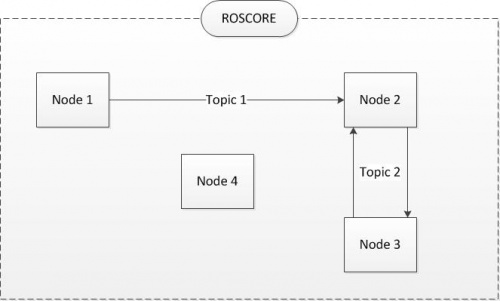

# Environment Variables


In [ ]:
export | grep ROS

In [ ]:
user ~ $ export | grep ROS
declare -x ROSLISP_PACKAGE_DIRECTORIES="/home/user/catkin_ws/devel/share/common-lisp"
declare -x ROS_DISTRO="indigo"
declare -x ROS_ETC_DIR="/opt/ros/indigo/etc/ros"
declare -x ROS_MASTER_URI="http://localhost:11311"
declare -x ROS_PACKAGE_PATH="/home/user/catkin_ws/src:/opt/ros/indigo/share:/opt/ros/indigo/stacks"
declare -x ROS_ROOT="/opt/ros/indigo/share/ros"

In [ ]:
ROS_MASTER_URI -> Contains the url where the ROS Core is being executed. Usually, your own computer (localhost).
ROS_PACKAGE_PATH -> Contains the paths in your Hard Drive where ROS has packages in it.